In [60]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [23]:
def textclean(Text):
    Text = Text.str.replace('http\S+|www.\S+|—','', case=False)
    Text = Text.str.replace("(<br/>)", "")
    Text = Text.str.replace('(<a).*(>).*(</a>)', '')
    Text = Text.str.replace('(&amp)', '')
    Text = Text.str.replace('(&gt)', '')
    Text = Text.str.replace('(&lt)', '')
    Text = Text.str.replace('(\xa0)', ' ') 
    Text = Text.str.replace('[^A-Za-z ]+', ' ')
    Text = Text.str.replace('[^A-Za-z ]+', '')
    #Text = Text.str.replace('—', '')
    return Text

In [51]:
df = pd.read_csv("trump_tweets.csv") 
df = df.rename(columns={'created_at': 'Date','text': 'Text'})
df = df.drop(columns=["source","id_str"])
df = df[~df['Text'].str.contains("RT @")]
sentiment = df.apply(lambda x : analyzer.polarity_scores(x['Text']), axis=1)
df['Compound'] =sentiment.apply(lambda x : x.get('compound') )
df['Text'] = textclean(df['Text'])
df['Len'] = df['Text'].apply(len)
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Len']<281]
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
df

,Text,Date,retweet_count,favorite_count,is_retweet,Compound,Len,word_count
0,LOUISIANA Tomorrow you will head to the polls...,2019-10-12 03:49:00,9706,35425,False,0.6892,209,34
1,Louisiana REPUBLICANS thank you for a great ev...,2019-10-12 03:48:00,10626,40844,False,0.8945,278,46
2,I never saw so many subpoenas ShannonBream ...,2019-10-12 03:25:00,15523,56841,False,-0.9284,230,38
3,So funny to watch Steve Kerr grovel and pander...,2019-10-12 03:25:00,20293,99524,False,-0.5266,163,31
4,WHERE S HUNTER,2019-10-12 02:58:00,26280,110222,False,0.0000,15,3
...,...,...,...,...,...,...,...,...
15248,Well the year has officially begun I have man...,2016-01-01 23:00:00,2642,8495,False,0.6325,138,27
15249,sprinklermanus CNN realDonaldTrump they re...,2016-01-01 21:29:00,933,3330,False,0.7351,112,17
15250,jallenaip Hillary said she was in a Fog of W...,2016-01-01 06:08:00,2721,7490,False,-0.8478,133,25
15251,Happy New Year from MarALago Thank you to my...,2016-01-01 06:07:00,1948,8258,False,0.9230,86,16


In [48]:
df.max()

Text              years as a pol in Connecticut Blumenthal would...
Date                                            2019-10-12 03:49:00
retweet_count                                                369530
favorite_count                                               879647
is_retweet                                                    False
Compound                                                     0.9899
Len                                                             280
dtype: object

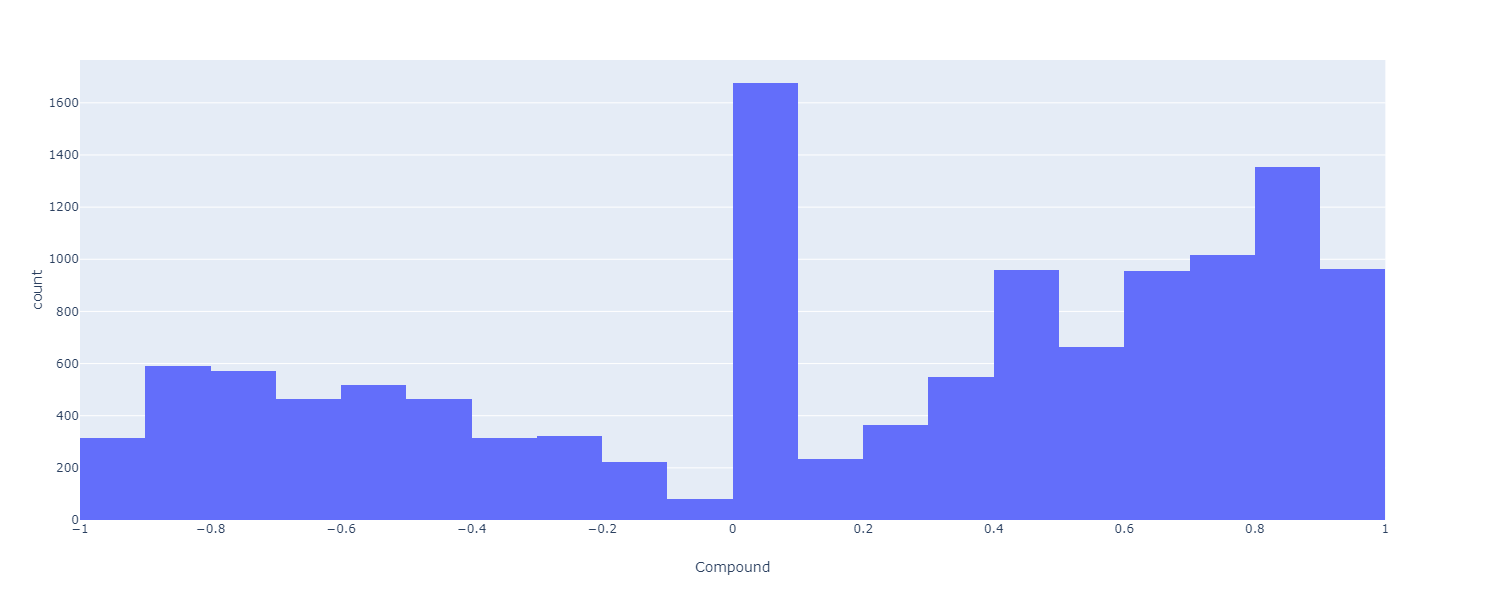

In [49]:
fig = px.histogram(df, x='Compound',nbins=20)
fig.show()

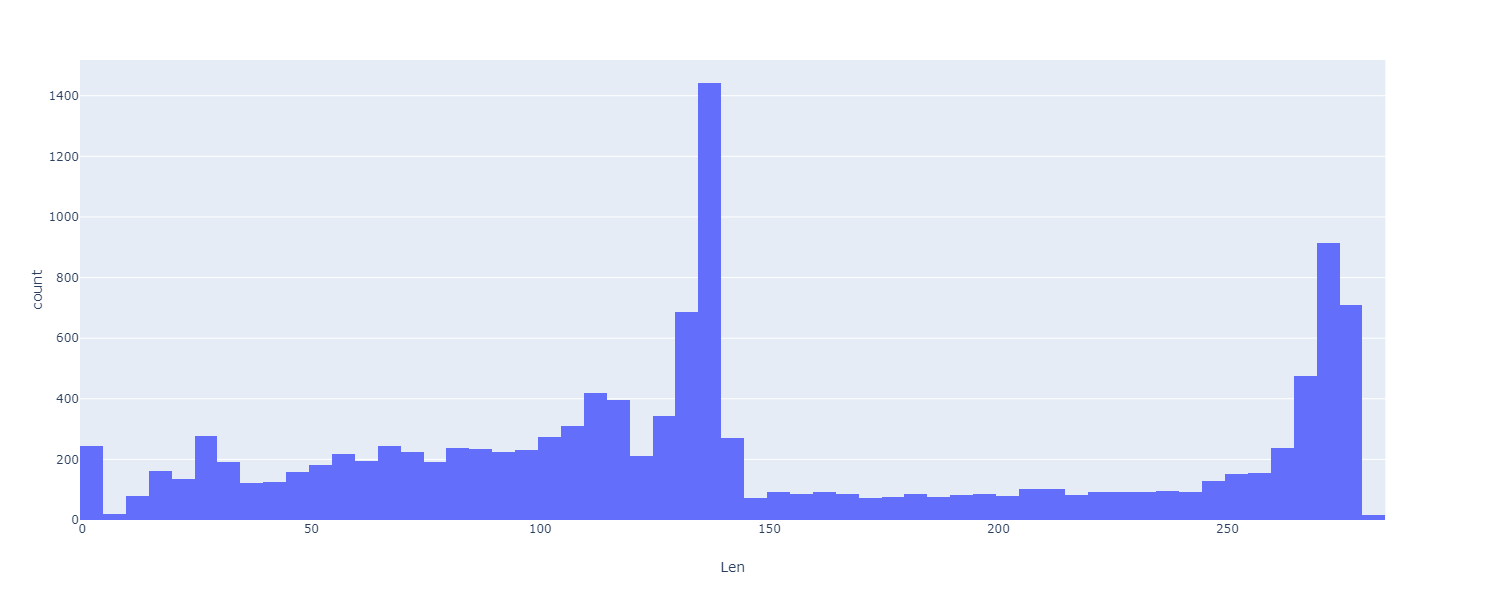

In [50]:
fig = px.histogram(df, x='Len')
fig.show()

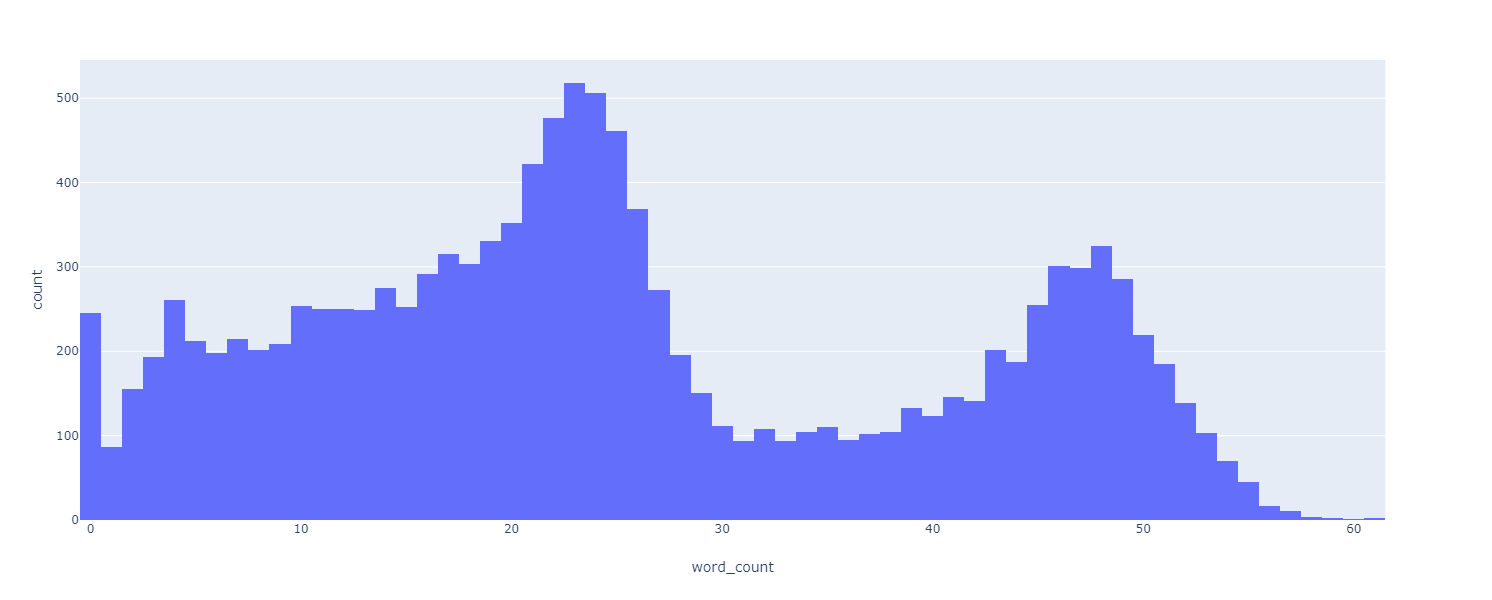

In [52]:
fig = px.histogram(df, x='word_count')
fig.show()

the 15273
to 8248
and 7884
of 6307
in 4975
is 4682
for 3683
on 2978
will 2948
that 2858
great 2675
be 2573
are 2505
with 2452
you 2444
our 2438
we 2376
it 2361
they 1945
have 1916


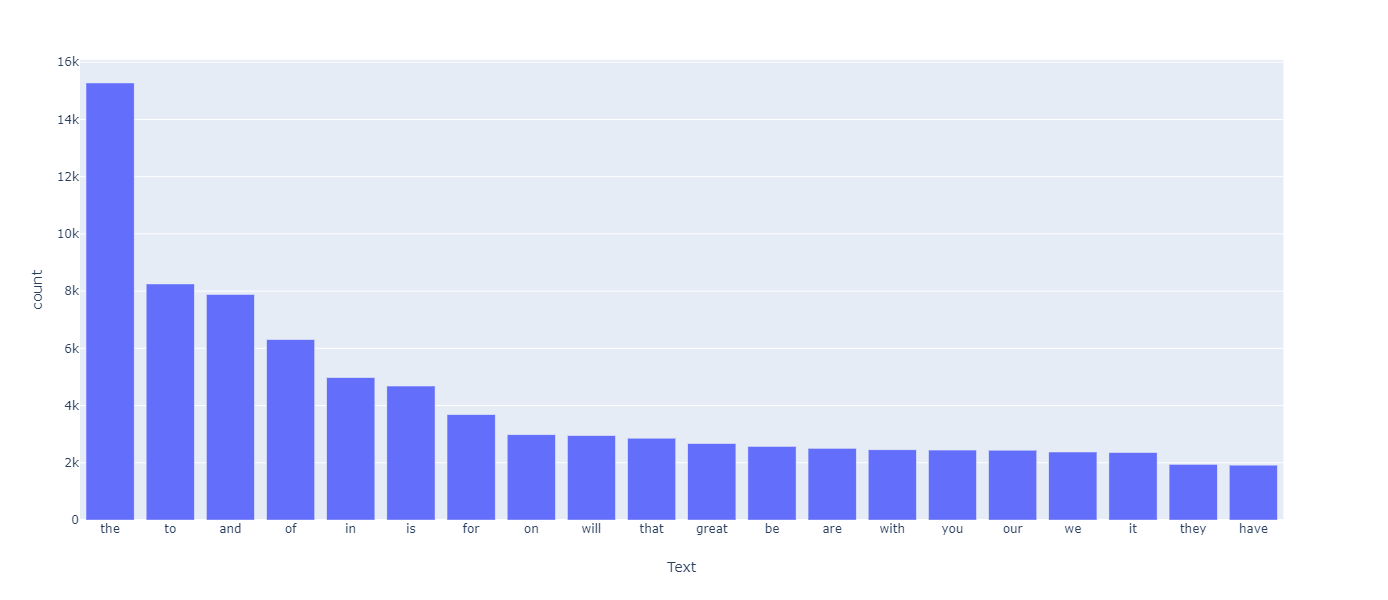

In [65]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=False)

fig = px.bar(df1, y='count',x='Text')
fig.show()


#df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
#    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')


great 2675
trump 1421
people 1311
thank 1265
just 1058
president 994
country 917
big 850
news 813
america 805
new 746
democrats 715
fake 702
hillary 670
time 642
today 638
make 632
border 618
media 557
good 538


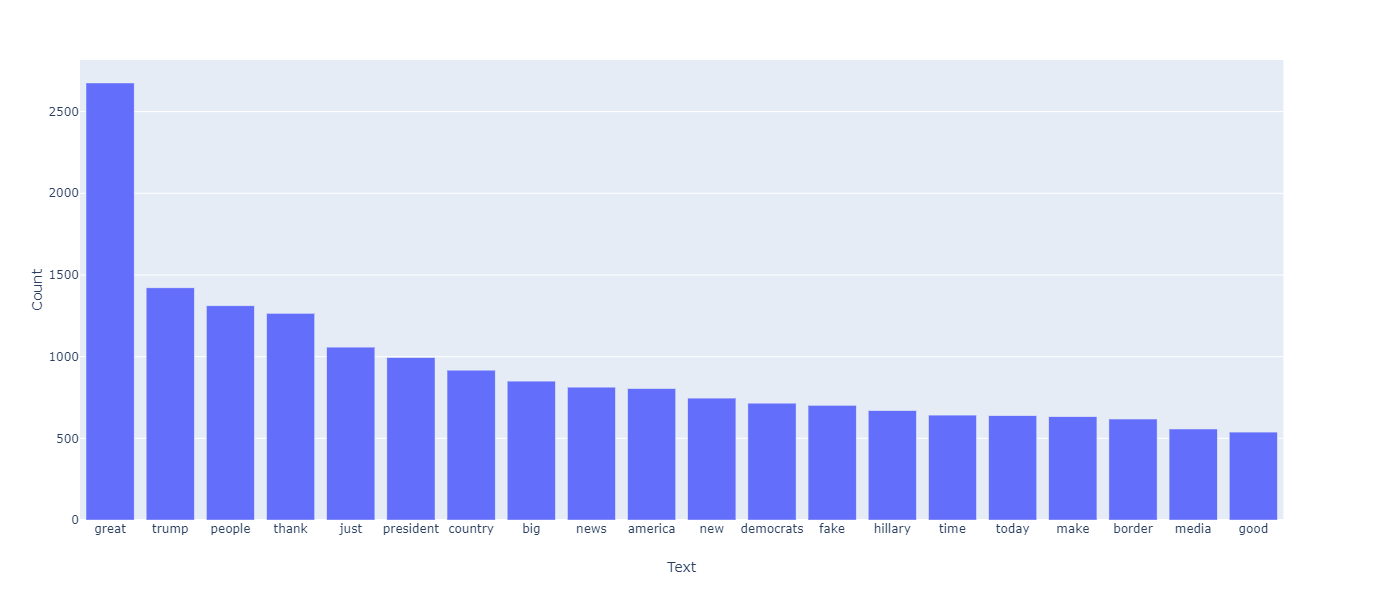

In [69]:
def get_top_n_words_stop(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words_stop(df['Text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Text' , 'Count'])
df2.groupby('Text').sum()['Count'].sort_values(ascending=False)
fig = px.bar(df2, y='Count',x='Text')
fig.show()


fake news 556
united states 389
america great 331
crooked hillary 330
make america 315
hillary clinton 276
witch hunt 261
white house 194
news media 182
north korea 177
new york 174
donald trump 158
great job 149
great honor 139
border security 139
great state 137
president trump 134
southern border 125
tax cuts 112
law enforcement 109


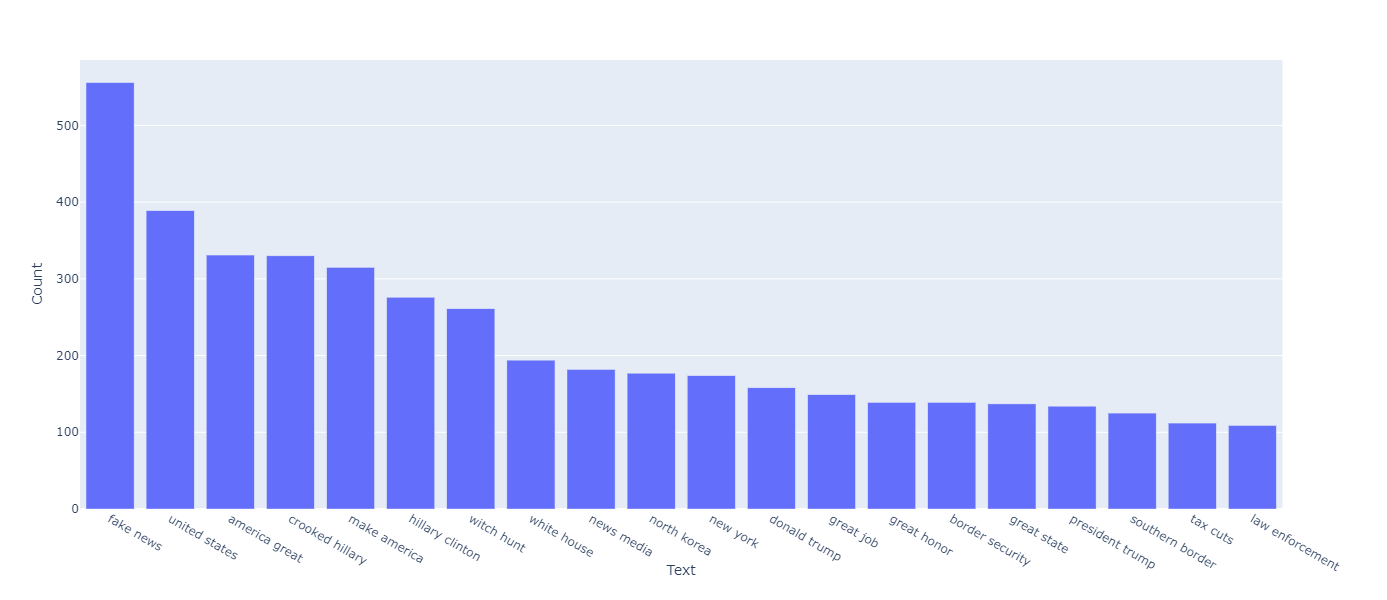

In [72]:
def get_top_n_bigram_stop(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram_stop(df['Text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Text' , 'Count'])
df4.groupby('Text').sum()['Count'].sort_values(ascending=False)
fig = px.bar(df4, y='Count',x='Text')
fig.show()

make america great 269
fake news media 173
crooked hillary clinton 125
new york times 75
doing great job 45
loves military vets 40
jobs jobs jobs 39
false twitter android 39
failing new york 36
make america safe 36
complete total endorsement 33
today great honor 31
great honor welcome 30
president united states 29
rigged witch hunt 29
making america great 29
radical left democrats 28
president donald trump 28
fake news cnn 28
america safe great 25


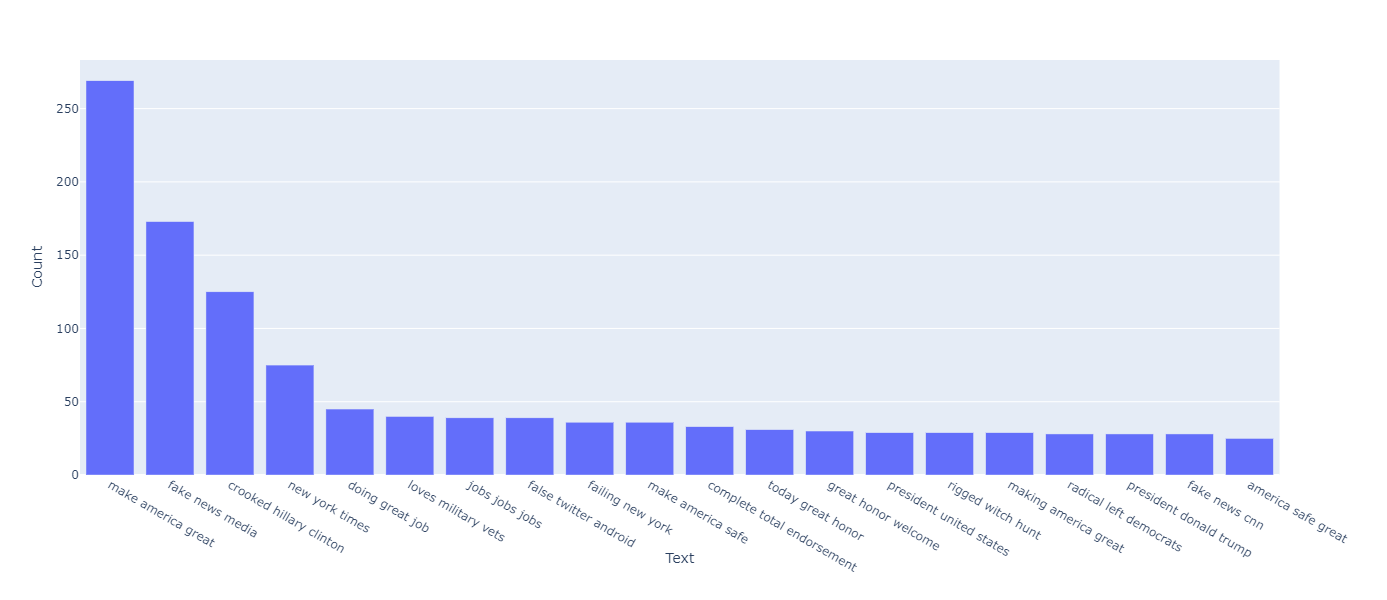

In [74]:
def get_top_n_trigram_stop(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram_stop(df['Text'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['Text' , 'Count'])
df5.groupby('Text').sum()['Count'].sort_values(ascending=False)

fig = px.bar(df5, y='Count',x='Text')
fig.show()


In [119]:
df_china = df[(df['Text'].str.contains("china", case=False))]
df_hillary = df[(df['Text'].str.contains("hillary", case=False)) | (df['Text'].str.contains("clinton", case=False))] 
df_america_great = df[(df['Text'].str.contains("america great", case=False))]
df_military = df[(df['Text'].str.contains("military", case=False))]
df_failing = df[(df['Text'].str.contains("failing", case=False))]
df_cnn = df[(df['Text'].str.contains("CNN", case=False))]
df_fox = df[(df['Text'].str.contains("fox", case=False))]
df_nyt = df[(df['Text'].str.contains("nyt", case=False)) | (df['Text'].str.contains("new york times", case=False)) ]
df_obama = df[(df['Text'].str.contains("obama", case=False))]



#df_wework = df_wework[(df_wework['text'].str.contains("IPO")) | (df_wework['text'].str.contains("ipo")) ]


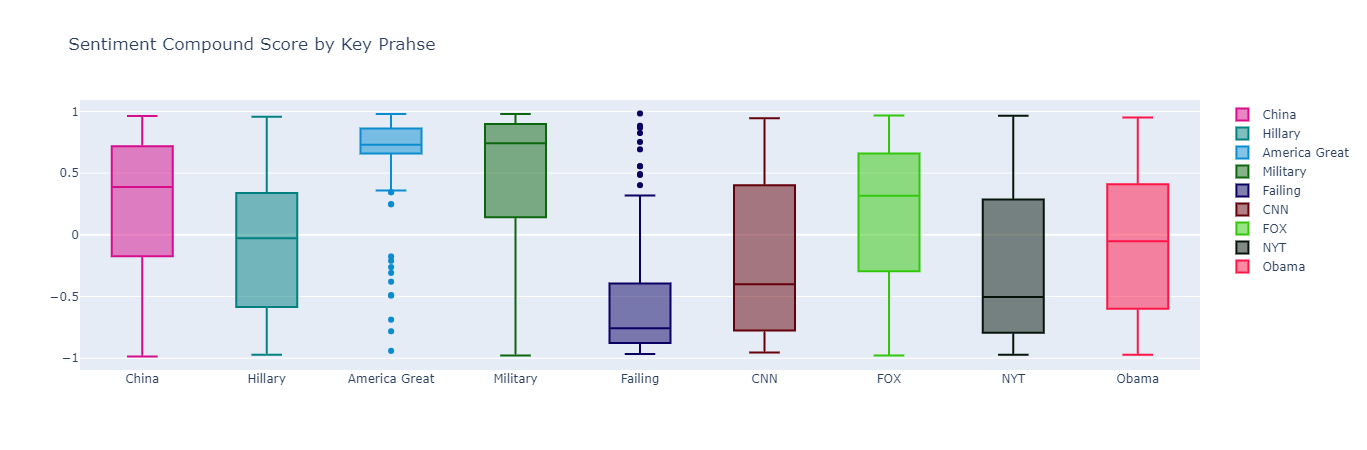

In [125]:
trace0 = go.Box(
    y=df_china.Compound,
    name = 'China',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=df_hillary.Compound,
    name = 'Hillary',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=df_america_great.Compound,
    name = 'America Great',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=df_military.Compound,
    name = 'Military',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=df_failing.Compound,
    name = 'Failing',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=df_cnn.Compound,
    name = 'CNN',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
trace6 = go.Box(
    y=df_fox.Compound,
    name = 'FOX',
    marker = dict(
        color = 'rgb(50, 200, 10)',
    )
)
trace7 = go.Box(
    y=df_nyt.Compound,
    name = 'NYT',
    marker = dict(
        color = 'rgb(5, 20, 10)',
    )
)

trace8 = go.Box(
    y=df_obama.Compound,
    name = 'Obama',
    marker = dict(
        color = 'rgb(300, 20, 70)',
    )
)


data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7,trace8]
layout = go.Layout(
    title = "Sentiment Compound Score by Key Prahse"
)

fig = go.Figure(data=data,layout=layout)
fig.show()

In [109]:
df_military

,Text,Date,retweet_count,favorite_count,is_retweet,Compound,Len,word_count
73,Turkey has been planning to attack the Kurds f...,2019-10-10 13:27:00,16674,69624,False,-0.9317,272,51
82,Impeached for what having created the greatest...,2019-10-10 03:53:00,19214,77698,False,0.8225,146,23
114,IN THE HISTORY OF OUR COUNTRY We went to war...,2019-10-09 12:14:00,19662,77850,False,-0.7431,275,48
198,down watching over a quagmire spending big ...,2019-10-07 15:20:00,15760,69107,False,-0.3578,273,49
199,I was elected on getting out of these ridiculo...,2019-10-07 15:20:00,21267,87908,False,0.6815,273,49
...,...,...,...,...,...,...,...,...
13434,In trade military and EVERYTHING else it will ...,2016-05-23 13:46:00,8213,22156,False,0.7519,134,23
13976,Nobody will protect our Nation like Donald J ...,2016-03-26 19:20:00,9554,27237,False,0.8953,140,23
14138,I will bring our jobs back to America fix our ...,2016-03-15 10:25:00,8086,19990,False,0.7003,135,27
14943,I will make our Military so big powerful str...,2016-01-24 15:08:00,4577,12169,False,0.3976,90,17
